In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path="/content/drive/MyDrive/FTS_CSV/cities_by_day.csv"
df=pd.read_csv(path)
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
29526,Visakhapatnam,6/27/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,6/28/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,6/29/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,6/30/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,7/1/2020,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [5]:
df.size

472496

In [6]:
df.shape

(29531, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  C6H6        23908 non-null  float64
 12  C7H8        21490 non-null  float64
 13  C8H10       11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [8]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [9]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
C6H6           5623
C7H8           8041
C8H10         18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [10]:
"""NaN=df['PM2.5'].isna().sum()
print("NaN=",NaN)
total=24933             #from count operation
non_null=total-NaN
print("None null=",non_null)"""

def NonNull(column):                          #to count non null values of each column
  NaN=df[column].isna().sum()
  total=29531                     #number of entries
  non=int(total)-int(NaN)
  print(column,"-> Non NULL=",non)

columns=df.columns
for column in columns:
  NonNull(column)



City -> Non NULL= 29531
Date -> Non NULL= 29531
PM2.5 -> Non NULL= 24933
PM10 -> Non NULL= 18391
NO -> Non NULL= 25949
NO2 -> Non NULL= 25946
NOx -> Non NULL= 25346
NH3 -> Non NULL= 19203
CO -> Non NULL= 27472
SO2 -> Non NULL= 25677
O3 -> Non NULL= 25509
C6H6 -> Non NULL= 23908
C7H8 -> Non NULL= 21490
C8H10 -> Non NULL= 11422
AQI -> Non NULL= 24850
AQI_Bucket -> Non NULL= 24850


In [11]:
non_null=df['C8H10'].count()
null=df['C8H10'].isnull().sum()
print(non_null,"   ",null)

11422     18109


In [12]:
#In the column C8H10 number of NaN values are more than number of non null so we can drop this column.
df=df.drop(['C8H10'],axis=1)
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,NaN,NaN


In [13]:
#replacing NaN values in columns of type float with respective mean
columns=df.columns
for name in columns:
  if name=="City" or name=="Date" or name=="AQI_Bucket":
    continue
  else:
    df[name].fillna(df[name].mean(axis=0),inplace=True)
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,166.463581,NaN
1,Ahmedabad,1/2/2015,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,166.463581,NaN
2,Ahmedabad,1/3/2015,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,166.463581,NaN
3,Ahmedabad,1/4/2015,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,166.463581,NaN
4,Ahmedabad,1/5/2015,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,166.463581,NaN


In [14]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
C6H6             0
C7H8             0
AQI              0
AQI_Bucket    4681
dtype: int64

In [15]:
df['AQI_Bucket']=df['AQI_Bucket'].astype('category')
df['Date']=pd.to_datetime(df['Date'])
df.dtypes


City                  object
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
C6H6                 float64
C7H8                 float64
AQI                  float64
AQI_Bucket          category
dtype: object

In [16]:
df['AQI_Bucket'].value_counts()

Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: AQI_Bucket, dtype: int64

In [17]:
df2=df[df['AQI_Bucket'].isna()] #we'll find NaN values by ML model later and merge it with original dataset
df1=df.dropna()

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24850 entries, 28 to 29530
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        24850 non-null  object        
 1   Date        24850 non-null  datetime64[ns]
 2   PM2.5       24850 non-null  float64       
 3   PM10        24850 non-null  float64       
 4   NO          24850 non-null  float64       
 5   NO2         24850 non-null  float64       
 6   NOx         24850 non-null  float64       
 7   NH3         24850 non-null  float64       
 8   CO          24850 non-null  float64       
 9   SO2         24850 non-null  float64       
 10  O3          24850 non-null  float64       
 11  C6H6        24850 non-null  float64       
 12  C7H8        24850 non-null  float64       
 13  AQI         24850 non-null  float64       
 14  AQI_Bucket  24850 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(12), object(1)
memory usag

In [19]:
df1.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
C6H6          0
C7H8          0
AQI           0
AQI_Bucket    0
dtype: int64

In [20]:
top_cities_10=df1.groupby('City').AQI.mean().sort_values(ascending=False)[:10]
#top 10 cities of max AQI
print(top_cities_10)

City
Ahmedabad       452.122939
Delhi           259.487744
Patna           240.782042
Gurugram        225.123882
Lucknow         217.973059
Talcher         172.886819
Jorapokhar      159.251621
Brajrajnagar    150.280505
Kolkata         140.566313
Guwahati        140.111111
Name: AQI, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


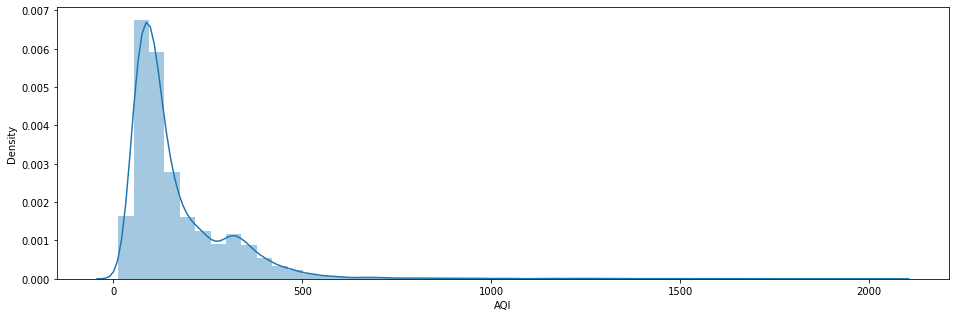

In [21]:
plt.figure(figsize=(16,5))
sns.distplot(df1['AQI'])

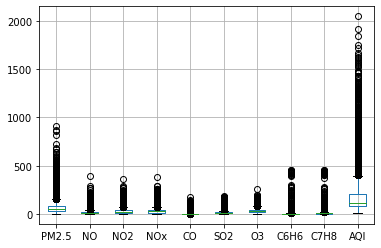

In [22]:
cols=[
 'PM2.5',
 'NO',
 'NO2',
 'NOx',
 'CO',
 'SO2',
 'O3',
 'C6H6',
 'C7H8',
 'AQI',
 ]
boxplot=df1.boxplot(column=cols[0:14])

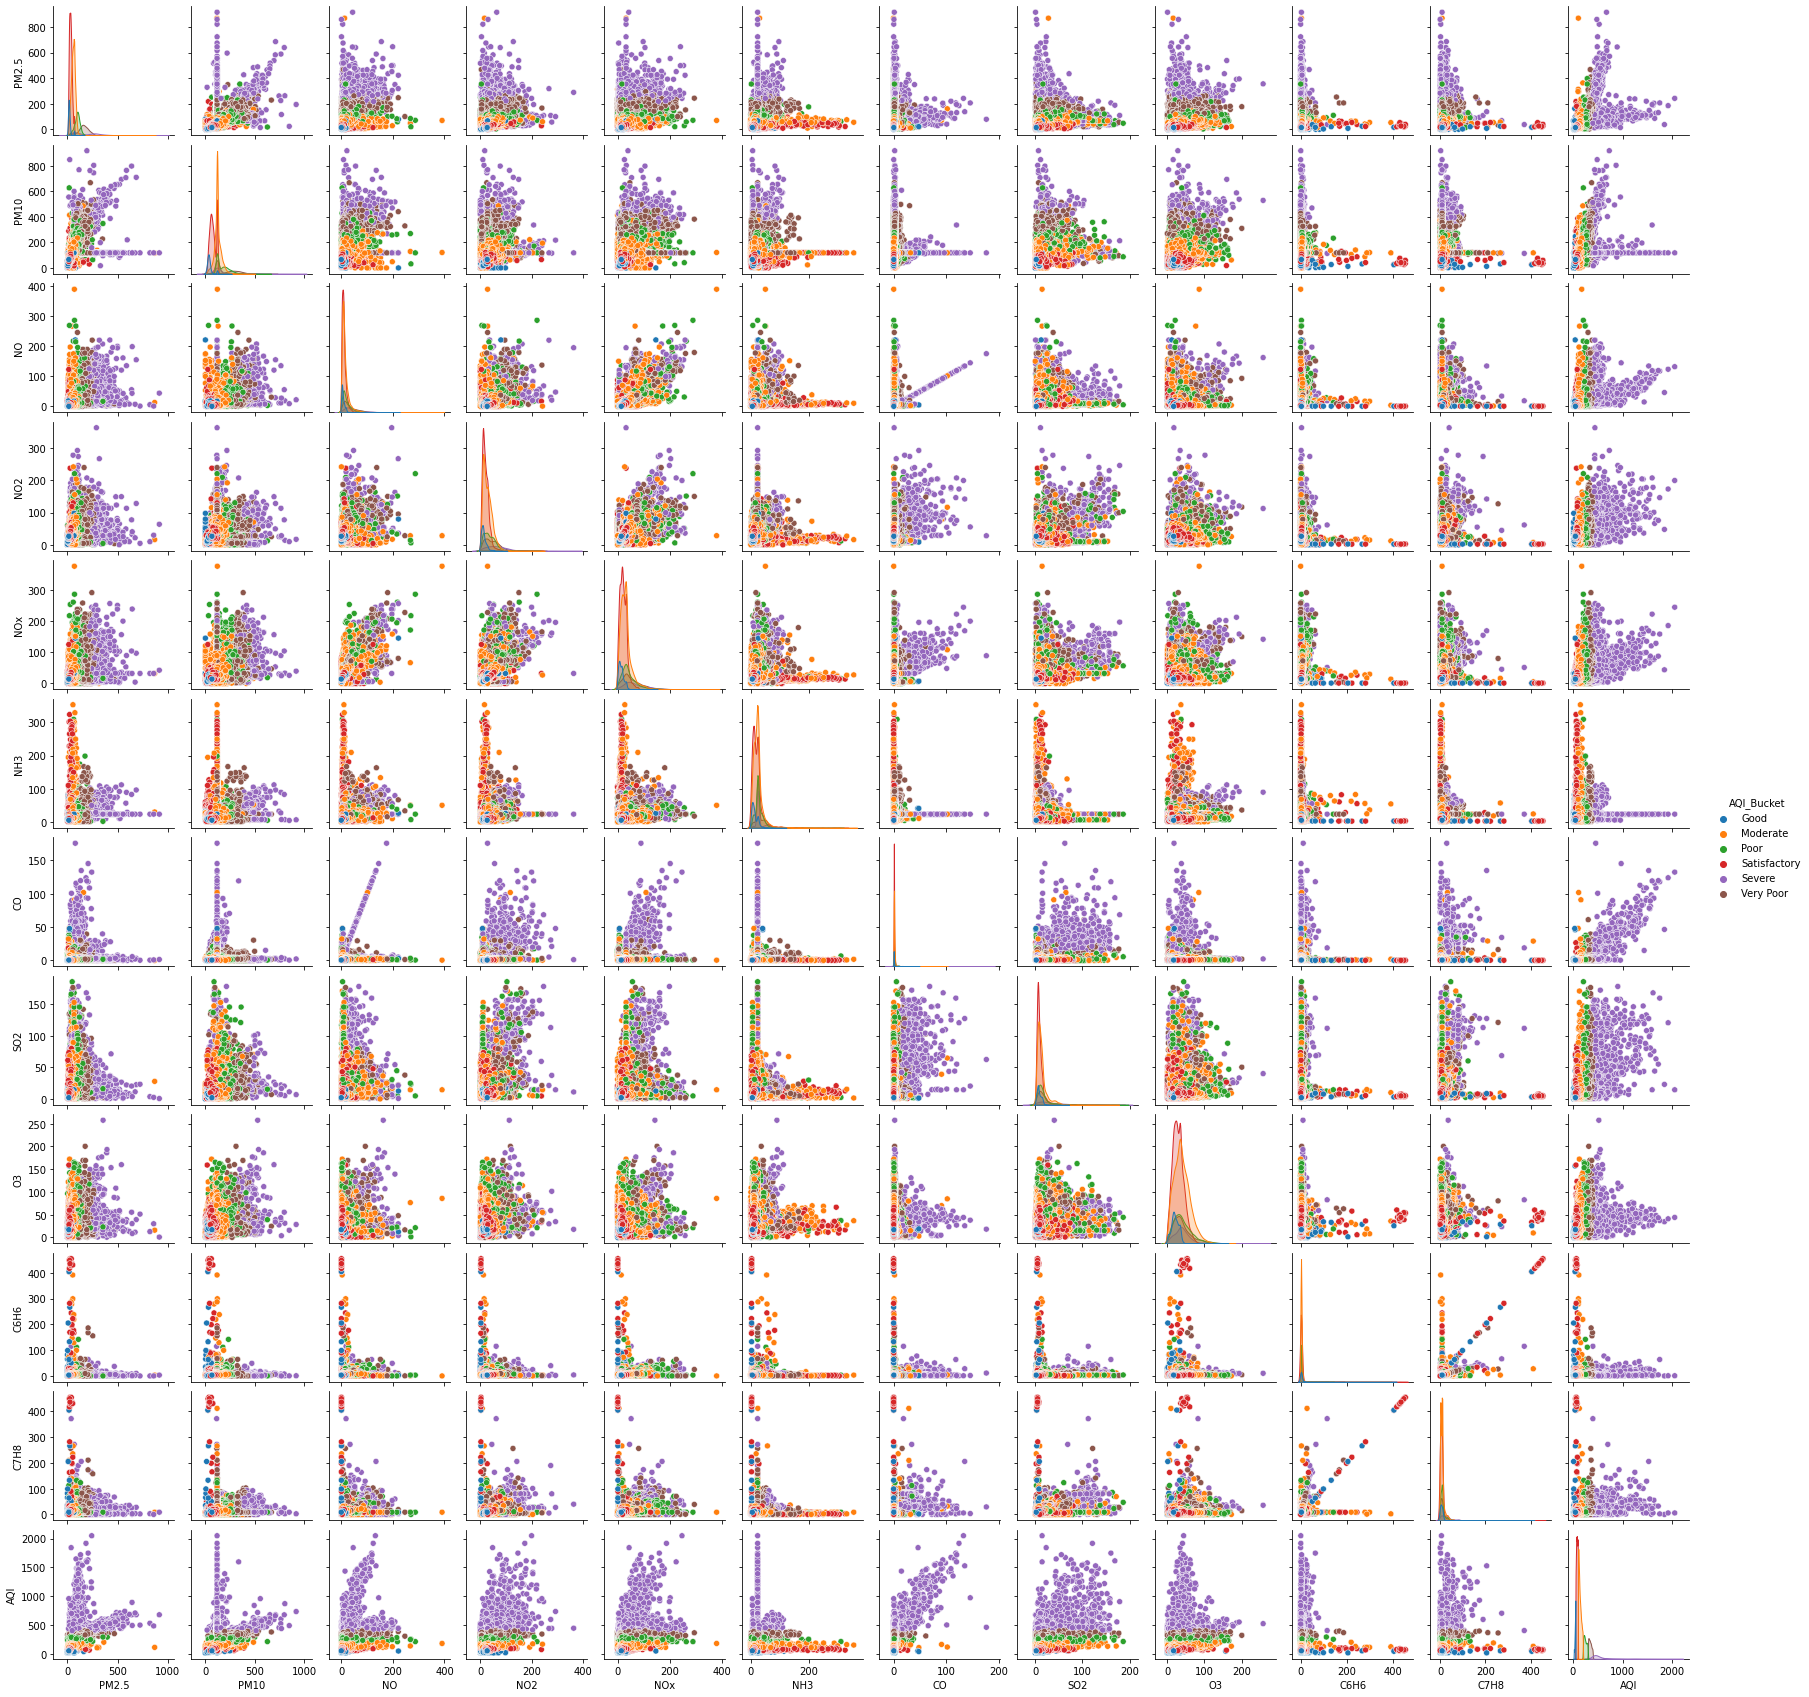

In [23]:
sns.pairplot(df1,hue='AQI_Bucket',height=2)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

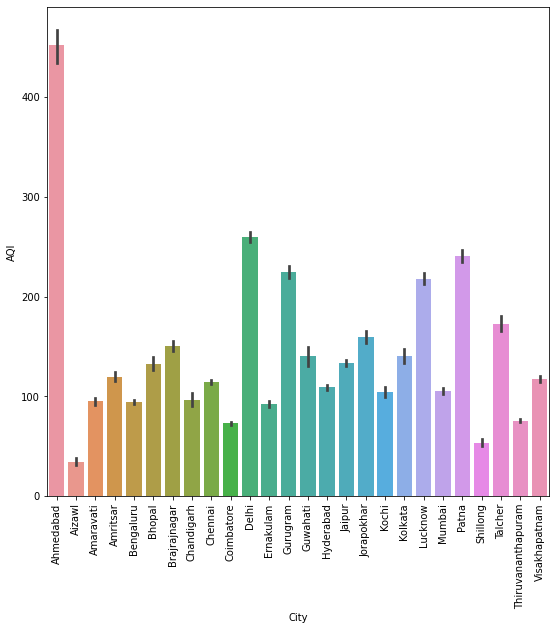

In [25]:
fig, ax = plt.subplots(figsize=(9,9))
chart=sns.barplot(x='City', y='AQI', data=df1)
plt.xticks(rotation=90)

In [21]:
numeric_data=df1.select_dtypes(include=[np.number])
numeric_data.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'C6H6',
       'C7H8', 'AQI'],
      dtype='object')

In [22]:
correlation=numeric_data.corr()
print(correlation['AQI'].sort_values(ascending=False),'\n')
#maximum effect on AQI is because of CO and PM2.5

AQI      1.000000
CO       0.678351
PM2.5    0.654743
NO2      0.535325
PM10     0.499126
SO2      0.484797
NOx      0.474232
NO       0.450700
C7H8     0.266785
O3       0.193988
NH3      0.139687
C6H6     0.043354
Name: AQI, dtype: float64 



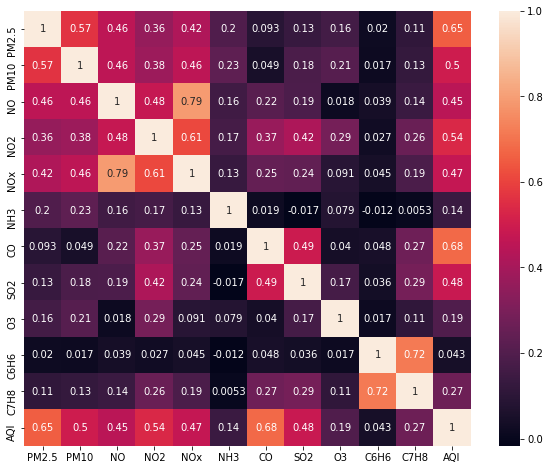

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True)

In [23]:
outliers=[]
def detect_outliers(data):            #Z-score
  threshold=3                                           #data after 3rd std in standard normal distribution will be considered outliers.
  mean=np.mean(data)
  std=np.std(data)
  c=0
  for i in data:
    z_score=(i-mean)/std
    if i>threshold:
      outliers.append([df.City.iloc[c],i])
    c+=1
  return outliers

outliers_CO=detect_outliers(df1['CO'])
outliers_PM2_5=detect_outliers(df1['PM2.5'])
outliers_PM10=detect_outliers(df1['PM10'])
outliers_NO=detect_outliers(df1['NO'])
outliers_NO2=detect_outliers(df1['NO2'])
outliers_NH3=detect_outliers(df1['NH3'])
outliers_SO2=detect_outliers(df1['SO2'])
outliers_O3=detect_outliers(df1['O3'])
outliers_C6H6=detect_outliers(df1['C6H6'])
outliers_C7H8=detect_outliers(df1['C7H8'])
outliers_AQI=detect_outliers(df1['AQI'])
print(len(outliers_AQI))

"""outliers_df1=[(outliers_AQI),(outliers_C6H6),(outliers_C7H8),(outliers_CO),(outliers_NH3),(outliers_NO),(outliers_NO2),(outliers_O3),(outliers_PM10),(outliers_PM2_5),(outliers_SO2)]
outliers_Df1=pd.DataFrame(outliers_df1)
outliers_Df1.head()"""



220251


'outliers_df1=[(outliers_AQI),(outliers_C6H6),(outliers_C7H8),(outliers_CO),(outliers_NH3),(outliers_NO),(outliers_NO2),(outliers_O3),(outliers_PM10),(outliers_PM2_5),(outliers_SO2)]\noutliers_Df1=pd.DataFrame(outliers_df1)\noutliers_Df1.head()'

In [37]:
def IQR_outlier(col):
  Q1=df1[col].quantile(0.25)
  Q3=df1[col].quantile(0.75)
  IQR=Q3-Q1
  lower_limit=Q3-1.5*IQR
  upper_limit=Q3+1.5*IQR
  df1_no_outlier=df1[(df[col]>lower_limit)&(df[col]<upper_limit)]
  return df1_no_outlier
                                            


In [38]:
cols=df1.columns
#cols=df1.iloc[:,2:13]
cols=cols[2:13]
cols
for col in cols:
  df1_no_outlier=IQR_outlier(col)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boole

In [43]:
df1_no_outlier.shape

(22161, 15)

In [44]:
df1.shape

(24850, 15)

In [45]:
df1_no_outlier.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,49.52,59.76,0.02,0.00,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,48.49,97.07,0.04,0.00,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,67.39,111.33,0.24,0.01,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,75.23,102.70,0.40,0.04,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,118.127103,54.56,35.31,72.80,23.483476,54.56,55.04,107.38,0.46,0.06,914.0,Severe
33,Ahmedabad,2015-02-03,139.70,118.127103,30.61,28.40,56.73,23.483476,30.61,33.79,73.60,0.17,0.03,660.0,Severe
34,Ahmedabad,2015-02-04,80.65,118.127103,2.37,22.83,24.00,23.483476,2.37,25.73,47.30,0.00,0.00,294.0,Poor
35,Ahmedabad,2015-02-05,58.36,118.127103,2.60,21.39,23.31,23.483476,2.60,32.66,53.54,0.00,0.00,149.0,Moderate
36,Ahmedabad,2015-02-06,79.29,118.127103,1.16,26.94,26.83,23.483476,1.16,67.41,59.30,0.00,0.00,190.0,Moderate
37,Ahmedabad,2015-02-07,88.70,118.127103,7.29,31.32,37.73,23.483476,7.29,80.09,44.76,0.00,0.00,247.0,Poor


In [46]:
df1.shape[0]-df1_no_outlier.shape[0]

2689